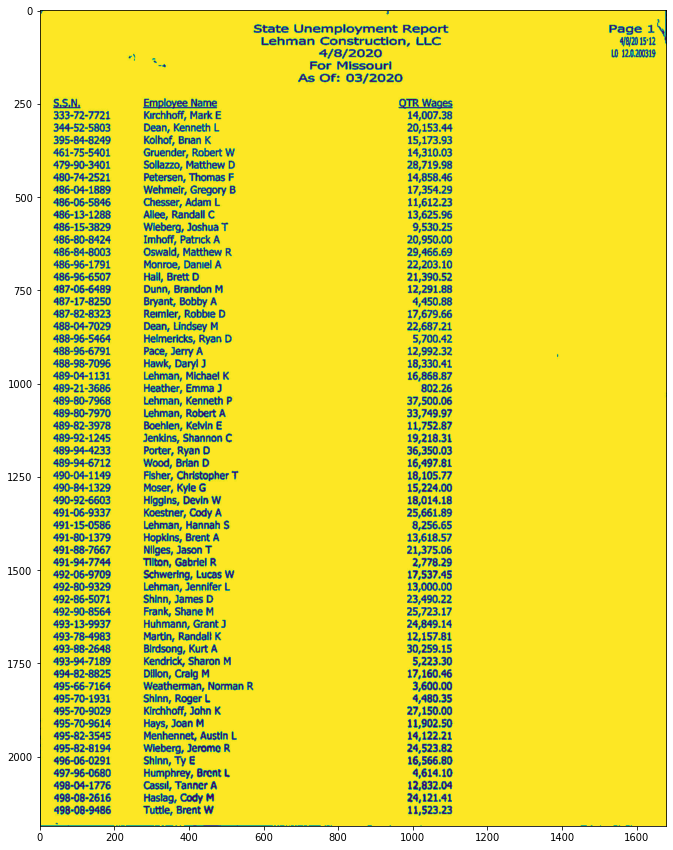

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
  
# Read Images
img = mpimg.imread('/home/vimal/Documents/table_detect_samples/pre/0347682000.jpeg')

plt.figure(figsize=(15,15))
# Output Images
plt.imshow(img)

In [2]:
from PIL import Image
import cv2
  
# Opens a image in RGB mode
im = Image.open(r"/home/vimal/Documents/table_detect_samples/pre/0347682000.jpeg")
#im =cv2.imread('/home/vimal/Documents/table_detect_samples/pre/0347682000.jpeg')
# Size of the image in pixels (size of orginal image)
# (This is not mandatory)
width, height = im.size
  
# Setting the points for cropped image
left = 5
top = height /10
right = 1600
bottom = 3 * height / 3
  
# Cropped image of above dimension
# (It will not change orginal image)
im1 = im.crop((left, top, right, bottom))
  
# Shows the image in image viewer

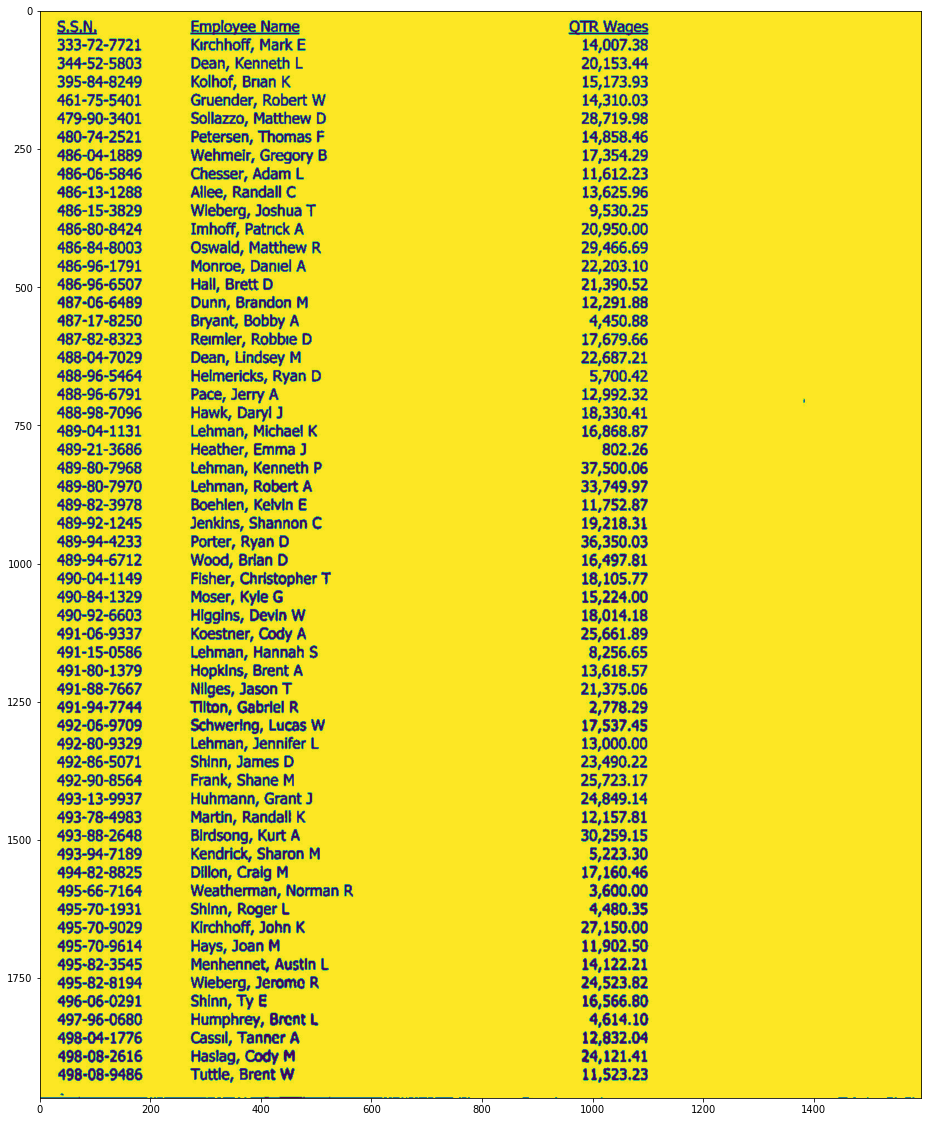

In [3]:
plt.figure(figsize=(20,20))
plt.imshow(im1)
#im1.save('crop_img')
im1.save('/home/vimal/Documents/table_detect_samples/unstructured tables/crop_images/0347682000_crop.jpeg')

In [4]:
import cv2
import pytesseract
from pytesseract import Output
import pandas as pd

img = cv2.imread('/home/vimal/Documents/table_detect_samples/unstructured tables/crop_images/0347682000_crop.jpeg')
img = cv2.resize(img, (int(img.shape[1] + (img.shape[1] * .1)),
                       int(img.shape[0] + (img.shape[0] * .25))),
                 interpolation=cv2.INTER_AREA)

img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

custom_config = r'-l eng --oem 3 --psm 6 -c tessedit_char_whitelist="ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789-:.$%./@& *"'
d = pytesseract.image_to_data(img_rgb, config=custom_config, output_type=Output.DICT)
df = pd.DataFrame(d)

df1 = df[(df.conf != '-1') & (df.text != ' ') & (df.text != '')]
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

sorted_blocks = df1.groupby('block_num').first().sort_values('top').index.tolist()
for block in sorted_blocks:
    curr = df1[df1['block_num'] == block]
    sel = curr[curr.text.str.len() > 3]
    # sel = curr
    char_w = (sel.width / sel.text.str.len()).mean()
    prev_par, prev_line, prev_left = 0, 0, 0
    text = ''
    for ix, ln in curr.iterrows():
        # add new line when necessary
        if prev_par != ln['par_num']:
            text += '\n'
            prev_par = ln['par_num']
            prev_line = ln['line_num']
            prev_left = 0
        elif prev_line != ln['line_num']:
            text += '\n'
            prev_line = ln['line_num']
            prev_left = 0

        added = 0  # num of spaces that should be added
        if ln['left'] / char_w > prev_left + 1:
            added = int((ln['left']) / char_w) - prev_left
            text += ' ' * added
        text += ln['text'] + ' '
        prev_left += len(ln['text']) + added + 1
    text += '\n'
    print(text)




SSN.               Employee Name                                    QTR Wages 
  333-72-7721      Kirchhoff Mark E                                   14.007.38 
  344-52-5803      Dean  Kenneth L                                    20.153.44 
  395-84-8249      Kolhof. Bran K                                     15.173.93 
  461-75-5401      Gruender Robert W                                  14.310.03 
  479-90-3401      Sollazzo Matthew D                                 28.719.98 
  480-74-2521      Petersen Thomas F                                  14.858.46 
  486-04-1889      Wehmelr  Gregory B                                 17354.29 
  486-06-5846      Chesser Adam  L                                    11612.23 
  486-13-1288      Allee Randall C                                    13625.96 
  486-15-3829      Wieberg. Joshua T                                   9/530.25 
  486-80-8424      Imhoff. Patrick A                                  20950.00 
  486-84-8003      Oswald. Matthe

In [26]:
text

'\nSSN.               Employee Name                                    QTR Wages \n  333-72-7721      Kirchhoff Mark E                                   14.007.38 \n  344-52-5803      Dean  Kenneth L                                    20.153.44 \n  395-84-8249      Kolhof. Bran K                                     15.173.93 \n  461-75-5401      Gruender Robert W                                  14.310.03 \n  479-90-3401      Sollazzo Matthew D                                 28.719.98 \n  480-74-2521      Petersen Thomas F                                  14.858.46 \n  486-04-1889      Wehmelr  Gregory B                                 17354.29 \n  486-06-5846      Chesser Adam  L                                    11612.23 \n  486-13-1288      Allee Randall C                                    13625.96 \n  486-15-3829      Wieberg. Joshua T                                   9/530.25 \n  486-80-8424      Imhoff. Patrick A                                  20950.00 \n  486-84-8003      

In [23]:
str=text.split()  
print(str)

['SSN.', 'Employee', 'Name', 'QTR', 'Wages', '333-72-7721', 'Kirchhoff', 'Mark', 'E', '14.007.38', '344-52-5803', 'Dean', 'Kenneth', 'L', '20.153.44', '395-84-8249', 'Kolhof.', 'Bran', 'K', '15.173.93', '461-75-5401', 'Gruender', 'Robert', 'W', '14.310.03', '479-90-3401', 'Sollazzo', 'Matthew', 'D', '28.719.98', '480-74-2521', 'Petersen', 'Thomas', 'F', '14.858.46', '486-04-1889', 'Wehmelr', 'Gregory', 'B', '17354.29', '486-06-5846', 'Chesser', 'Adam', 'L', '11612.23', '486-13-1288', 'Allee', 'Randall', 'C', '13625.96', '486-15-3829', 'Wieberg.', 'Joshua', 'T', '9/530.25', '486-80-8424', 'Imhoff.', 'Patrick', 'A', '20950.00', '486-84-8003', 'Oswald.', 'Matthew', 'R', '29.466.69', '486-96-1791', 'Monroe.', 'Daniel', 'A', '22203.10', '486-96-6507', 'Hall', 'Brett', 'D', '21390.52', '487-06-6489', 'Dunn', 'Brandon', 'M', '12291.88', '487-17-8250', 'Bryant.', 'Bobby', 'A', '4.450.88', '487-82-8323', 'Reimler', 'Robbie', 'D', '17679.66', '488-04-7029', 'Dean.', 'Lindsey', 'M', '22687.21', '

In [25]:
import re

re.sub("\s+", ",", text.strip())

'SSN.,Employee,Name,QTR,Wages,333-72-7721,Kirchhoff,Mark,E,14.007.38,344-52-5803,Dean,Kenneth,L,20.153.44,395-84-8249,Kolhof.,Bran,K,15.173.93,461-75-5401,Gruender,Robert,W,14.310.03,479-90-3401,Sollazzo,Matthew,D,28.719.98,480-74-2521,Petersen,Thomas,F,14.858.46,486-04-1889,Wehmelr,Gregory,B,17354.29,486-06-5846,Chesser,Adam,L,11612.23,486-13-1288,Allee,Randall,C,13625.96,486-15-3829,Wieberg.,Joshua,T,9/530.25,486-80-8424,Imhoff.,Patrick,A,20950.00,486-84-8003,Oswald.,Matthew,R,29.466.69,486-96-1791,Monroe.,Daniel,A,22203.10,486-96-6507,Hall,Brett,D,21390.52,487-06-6489,Dunn,Brandon,M,12291.88,487-17-8250,Bryant.,Bobby,A,4.450.88,487-82-8323,Reimler,Robbie,D,17679.66,488-04-7029,Dean.,Lindsey,M,22687.21,488-96-5464,Helmericks.,Ryan,D,5700.42,488-96-6791,Pace,Jerry,A,12992.32,:,488-98-7096,Hawk,Daryl,J,18330.41,489-04-1131,Lehman,Michael,K,16868.87,489-21-3686,Heather,Emma,J,802.26,489-80-7968,Lehman,Kenneth,P,37500.06,489-80-7970,Lehman,Robert,A,33749.97,489-82-3978,Boehlen,Kelvin,E,1

In [29]:
 b = ' '.join( filter( len, text.split( ' ' ) ) )
print(b)


SSN. Employee Name QTR Wages 
 333-72-7721 Kirchhoff Mark E 14.007.38 
 344-52-5803 Dean Kenneth L 20.153.44 
 395-84-8249 Kolhof. Bran K 15.173.93 
 461-75-5401 Gruender Robert W 14.310.03 
 479-90-3401 Sollazzo Matthew D 28.719.98 
 480-74-2521 Petersen Thomas F 14.858.46 
 486-04-1889 Wehmelr Gregory B 17354.29 
 486-06-5846 Chesser Adam L 11612.23 
 486-13-1288 Allee Randall C 13625.96 
 486-15-3829 Wieberg. Joshua T 9/530.25 
 486-80-8424 Imhoff. Patrick A 20950.00 
 486-84-8003 Oswald. Matthew R 29.466.69 
 486-96-1791 Monroe. Daniel A 22203.10 
 486-96-6507 Hall Brett D 21390.52 
 487-06-6489 Dunn Brandon M 12291.88 
 487-17-8250 Bryant. Bobby A 4.450.88 
 487-82-8323 Reimler Robbie D 17679.66 
 488-04-7029 Dean. Lindsey M 22687.21 
 488-96-5464 Helmericks. Ryan D 5700.42 
 488-96-6791 Pace Jerry A 12992.32 : 
 488-98-7096 Hawk Daryl J 18330.41 
 489-04-1131 Lehman Michael K 16868.87 
 489-21-3686 Heather Emma J 802.26 
 489-80-7968 Lehman Kenneth P 37500.06 
 489-80-7970 Lehma

In [36]:
for i in text:
    print(i)



S
S
N
.
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
E
m
p
l
o
y
e
e
 
N
a
m
e
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
Q
T
R
 
W
a
g
e
s
 


 
 
3
3
3
-
7
2
-
7
7
2
1
 
 
 
 
 
 
K
i
r
c
h
h
o
f
f
 
M
a
r
k
 
E
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
1
4
.
0
0
7
.
3
8
 


 
 
3
4
4
-
5
2
-
5
8
0
3
 
 
 
 
 
 
D
e
a
n
 
 
K
e
n
n
e
t
h
 
L
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
2
0
.
1
5
3
.
4
4
 


 
 
3
9
5
-
8
4
-
8
2
4
9
 
 
 
 
 
 
K
o
l
h
o
f
.
 
B
r
a
n
 
K
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
1
5
.
1
7
3
.
9
3
 


 
 
4
6
1
-
7
5
-
5
4
0
1
 
 
 
 
 
 
G
r
u
e
n
d
e
r
 
R
o
b
e
r
t
 
W
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
1
4
.
3
1
0
.
0
3
 


 
 
4
7
9
-
9
0
-
3
4
0
1
 
 
 
 
 
 
S
o
l
l
a
z
z
o
 
M
a
t
t
h
e
w
 
D
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
2
8
.
7
1
9
.
9
8
 


 
 
4
8
0
-
7
4
-
2
5
2
1
 
 


In [32]:
# importing pandas as pd
import pandas as pd
# import the StrinIO function
# from io module
from io import StringIO
# wrap the string data in StringIO function
StringData = StringIO(b)
# let's read the data using the Pandas
# read_csv() function
df = pd.read_csv(StringData, sep =",")
# Print the dataframe
print(df)

                  SSN. Employee Name QTR Wages 
0       333-72-7721 Kirchhoff Mark E 14.007.38 
1         344-52-5803 Dean Kenneth L 20.153.44 
2         395-84-8249 Kolhof. Bran K 15.173.93 
3      461-75-5401 Gruender Robert W 14.310.03 
4     479-90-3401 Sollazzo Matthew D 28.719.98 
5      480-74-2521 Petersen Thomas F 14.858.46 
6       486-04-1889 Wehmelr Gregory B 17354.29 
7          486-06-5846 Chesser Adam L 11612.23 
8         486-13-1288 Allee Randall C 13625.96 
9       486-15-3829 Wieberg. Joshua T 9/530.25 
10      486-80-8424 Imhoff. Patrick A 20950.00 
11     486-84-8003 Oswald. Matthew R 29.466.69 
12       486-96-1791 Monroe. Daniel A 22203.10 
13           486-96-6507 Hall Brett D 21390.52 
14         487-06-6489 Dunn Brandon M 12291.88 
15        487-17-8250 Bryant. Bobby A 4.450.88 
16       487-82-8323 Reimler Robbie D 17679.66 
17        488-04-7029 Dean. Lindsey M 22687.21 
18      488-96-5464 Helmericks. Ryan D 5700.42 
19         488-96-6791 Pace Jerry A 1299

In [33]:
type(df)

pandas.core.frame.DataFrame

In [35]:
df.shape

(57, 1)

In [5]:
fin = open("/home/vimal/Documents/table_detect_samples/unstructured tables/text/0347682000_text.txt", "rt")
fout = open("/home/vimal/Documents/table_detect_samples/unstructured tables/text/out.txt", "wt")

In [6]:
for line in fin:
	fout.write(' '.join(line.split()))
	
fin.close()
fout.close()

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io

In [19]:
file = io.StringIO(text.)

In [20]:
print(file)

In [21]:
data = pd.read_csv(file,delimiter=' ',skipinitialspace=True,error_bad_lines=False)

b'Skipping line 22: expected 6 fields, saw 7\n'


In [22]:
print(data)

            SSN.     Employee         Name QTR      Wages  Unnamed: 5
0    333-72-7721    Kirchhoff         Mark   E  14.007.38         NaN
1    344-52-5803         Dean      Kenneth   L  20.153.44         NaN
2    395-84-8249      Kolhof.         Bran   K  15.173.93         NaN
3    461-75-5401     Gruender       Robert   W  14.310.03         NaN
4    479-90-3401     Sollazzo      Matthew   D  28.719.98         NaN
5    480-74-2521     Petersen       Thomas   F  14.858.46         NaN
6    486-04-1889      Wehmelr      Gregory   B   17354.29         NaN
7    486-06-5846      Chesser         Adam   L   11612.23         NaN
8    486-13-1288        Allee      Randall   C   13625.96         NaN
9    486-15-3829     Wieberg.       Joshua   T   9/530.25         NaN
10   486-80-8424      Imhoff.      Patrick   A   20950.00         NaN
11   486-84-8003      Oswald.      Matthew   R  29.466.69         NaN
12   486-96-1791      Monroe.       Daniel   A   22203.10         NaN
13   486-96-6507    

In [39]:
def despace(sentence):
  while "  " in sentence:
    sentence = sentence.replace("  ",",")
  return sentence

In [40]:
sentence = 'hi i   am working    as     data scientist'

In [41]:
despace(sentence)

'hi i, am working,,as,, data scientist'

In [42]:
text

'\nSSN.               Employee Name                                    QTR Wages \n  333-72-7721      Kirchhoff Mark E                                   14.007.38 \n  344-52-5803      Dean  Kenneth L                                    20.153.44 \n  395-84-8249      Kolhof. Bran K                                     15.173.93 \n  461-75-5401      Gruender Robert W                                  14.310.03 \n  479-90-3401      Sollazzo Matthew D                                 28.719.98 \n  480-74-2521      Petersen Thomas F                                  14.858.46 \n  486-04-1889      Wehmelr  Gregory B                                 17354.29 \n  486-06-5846      Chesser Adam  L                                    11612.23 \n  486-13-1288      Allee Randall C                                    13625.96 \n  486-15-3829      Wieberg. Joshua T                                   9/530.25 \n  486-80-8424      Imhoff. Patrick A                                  20950.00 \n  486-84-8003      

In [43]:
despace(text)

'\nSSN.,,,,,,, Employee Name,,,,,,,,,,,,,,,,,,QTR Wages \n,333-72-7721,,,Kirchhoff Mark E,,,,,,,,,,,,,,,,, 14.007.38 \n,344-52-5803,,,Dean,Kenneth L,,,,,,,,,,,,,,,,,,20.153.44 \n,395-84-8249,,,Kolhof. Bran K,,,,,,,,,,,,,,,,,, 15.173.93 \n,461-75-5401,,,Gruender Robert W,,,,,,,,,,,,,,,,,14.310.03 \n,479-90-3401,,,Sollazzo Matthew D,,,,,,,,,,,,,,,, 28.719.98 \n,480-74-2521,,,Petersen Thomas F,,,,,,,,,,,,,,,,,14.858.46 \n,486-04-1889,,,Wehmelr,Gregory B,,,,,,,,,,,,,,,, 17354.29 \n,486-06-5846,,,Chesser Adam,L,,,,,,,,,,,,,,,,,,11612.23 \n,486-13-1288,,,Allee Randall C,,,,,,,,,,,,,,,,,,13625.96 \n,486-15-3829,,,Wieberg. Joshua T,,,,,,,,,,,,,,,,, 9/530.25 \n,486-80-8424,,,Imhoff. Patrick A,,,,,,,,,,,,,,,,,20950.00 \n,486-84-8003,,,Oswald. Matthew R,,,,,,,,,,,,,,,,,29.466.69 \n,486-96-1791,,,Monroe. Daniel A,,,,,,,,,,,,,,,,, 22203.10 \n,486-96-6507,,,Hall Brett D,,,,,,,,,,,,,,,,,,, 21390.52 \n,487-06-6489,,,Dunn,Brandon M,,,,,,,,,,,,,,,,,,12291.88 \n,487-17-8250,,,Bryant. Bobby A,,,,,,,,,,,,,

In [44]:
print(text)


SSN.               Employee Name                                    QTR Wages 
  333-72-7721      Kirchhoff Mark E                                   14.007.38 
  344-52-5803      Dean  Kenneth L                                    20.153.44 
  395-84-8249      Kolhof. Bran K                                     15.173.93 
  461-75-5401      Gruender Robert W                                  14.310.03 
  479-90-3401      Sollazzo Matthew D                                 28.719.98 
  480-74-2521      Petersen Thomas F                                  14.858.46 
  486-04-1889      Wehmelr  Gregory B                                 17354.29 
  486-06-5846      Chesser Adam  L                                    11612.23 
  486-13-1288      Allee Randall C                                    13625.96 
  486-15-3829      Wieberg. Joshua T                                   9/530.25 
  486-80-8424      Imhoff. Patrick A                                  20950.00 
  486-84-8003      Oswald. Matthe

In [62]:
test = text.replace("   ", ",")

In [63]:
print(test)


SSN.,,,,,Employee Name,,,,,,,,,,,,QTR Wages 
  333-72-7721,,Kirchhoff Mark E,,,,,,,,,,,  14.007.38 
  344-52-5803,,Dean  Kenneth L,,,,,,,,,,,,20.153.44 
  395-84-8249,,Kolhof. Bran K,,,,,,,,,,,, 15.173.93 
  461-75-5401,,Gruender Robert W,,,,,,,,,,, 14.310.03 
  479-90-3401,,Sollazzo Matthew D,,,,,,,,,,,28.719.98 
  480-74-2521,,Petersen Thomas F,,,,,,,,,,, 14.858.46 
  486-04-1889,,Wehmelr  Gregory B,,,,,,,,,,,17354.29 
  486-06-5846,,Chesser Adam  L,,,,,,,,,,,,11612.23 
  486-13-1288,,Allee Randall C,,,,,,,,,,,,13625.96 
  486-15-3829,,Wieberg. Joshua T,,,,,,,,,,,  9/530.25 
  486-80-8424,,Imhoff. Patrick A,,,,,,,,,,, 20950.00 
  486-84-8003,,Oswald. Matthew R,,,,,,,,,,, 29.466.69 
  486-96-1791,,Monroe. Daniel A,,,,,,,,,,,  22203.10 
  486-96-6507,,Hall Brett D,,,,,,,,,,,,,21390.52 
  487-06-6489,,Dunn  Brandon M,,,,,,,,,,,,12291.88 
  487-17-8250,,Bryant. Bobby A,,,,,,,,,,,, 4.450.88 
  487-82-8323,,Reimler Robbie D,,,,,,,,,,,  17679.66 
  488-04-7029,,Dean. Lindsey M,,,,,,,,,,,,2

In [64]:
text_file = open("comma_text.txt", "wt")
n = text_file.write(test)
text_file.close()

In [50]:
fin = open("comma_text.txt", "rt")
fout = open("comma_text_out.txt", "wt")

for line in fin:
	fout.write(','.join(line.split()))
	
fin.close()
fout.close()

In [53]:
import pandas as pd
  
# readinag given csv file
# and creating dataframe
dataframe1 = pd.read_csv("comma_text.txt")
  
# storing this dataframe in a csv file
#x=dataframe1.to_csv('comma_csv.csv', 
                  #index = None)

ParserError: Error tokenizing data. C error: Expected 26 fields in line 22, saw 34


In [65]:
import pandas as pd

data = pd.read_csv('comma_texAt (copy).txt')
print (data)

            SSN.     Employee Name  QTR Wages 
NaN  333-72-7721  Kirchhoff Mark E  14.007.38 
NaN  344-52-5803    Dean Kenneth L  20.153.44 
NaN  395-84-8249    Kolhof. Bran K  15.173.93 


In [66]:
regexp_replace(text, ",{2,}", ",")

NameError: name 'regexp_replace' is not defined

In [68]:
test

'\nSSN.,,,,,Employee Name,,,,,,,,,,,,QTR Wages \n  333-72-7721,,Kirchhoff Mark E,,,,,,,,,,,  14.007.38 \n  344-52-5803,,Dean  Kenneth L,,,,,,,,,,,,20.153.44 \n  395-84-8249,,Kolhof. Bran K,,,,,,,,,,,, 15.173.93 \n  461-75-5401,,Gruender Robert W,,,,,,,,,,, 14.310.03 \n  479-90-3401,,Sollazzo Matthew D,,,,,,,,,,,28.719.98 \n  480-74-2521,,Petersen Thomas F,,,,,,,,,,, 14.858.46 \n  486-04-1889,,Wehmelr  Gregory B,,,,,,,,,,,17354.29 \n  486-06-5846,,Chesser Adam  L,,,,,,,,,,,,11612.23 \n  486-13-1288,,Allee Randall C,,,,,,,,,,,,13625.96 \n  486-15-3829,,Wieberg. Joshua T,,,,,,,,,,,  9/530.25 \n  486-80-8424,,Imhoff. Patrick A,,,,,,,,,,, 20950.00 \n  486-84-8003,,Oswald. Matthew R,,,,,,,,,,, 29.466.69 \n  486-96-1791,,Monroe. Daniel A,,,,,,,,,,,  22203.10 \n  486-96-6507,,Hall Brett D,,,,,,,,,,,,,21390.52 \n  487-06-6489,,Dunn  Brandon M,,,,,,,,,,,,12291.88 \n  487-17-8250,,Bryant. Bobby A,,,,,,,,,,,, 4.450.88 \n  487-82-8323,,Reimler Robbie D,,,,,,,,,,,  17679.66 \n  488-04-7029,,Dean. Li

In [87]:
import re
pattern = re.compile(r'(,){2,}')

In [88]:
x = (re.sub(pattern, ',', test))

In [89]:
text_file = open("final_text.txt", "wt")
n = text_file.write(x)
text_file.close()

In [93]:
import pandas as pd

data = pd.read_csv('final_text.txt')
print (data)

              SSN.          Employee Name    QTR Wages 
0      333-72-7721       Kirchhoff Mark E    14.007.38 
1      344-52-5803        Dean  Kenneth L    20.153.44 
2      395-84-8249         Kolhof. Bran K    15.173.93 
3      461-75-5401      Gruender Robert W    14.310.03 
4      479-90-3401     Sollazzo Matthew D    28.719.98 
5      480-74-2521      Petersen Thomas F    14.858.46 
6      486-04-1889     Wehmelr  Gregory B     17354.29 
7      486-06-5846        Chesser Adam  L     11612.23 
8      486-13-1288        Allee Randall C     13625.96 
9      486-15-3829      Wieberg. Joshua T     9/530.25 
10     486-80-8424      Imhoff. Patrick A     20950.00 
11     486-84-8003      Oswald. Matthew R    29.466.69 
12     486-96-1791       Monroe. Daniel A     22203.10 
13     486-96-6507           Hall Brett D     21390.52 
14     487-06-6489        Dunn  Brandon M     12291.88 
15     487-17-8250        Bryant. Bobby A     4.450.88 
16     487-82-8323       Reimler Robbie D     17

In [94]:
type(data)

pandas.core.frame.DataFrame

In [79]:
#test_string = 'a, b, , c, , , d, , , e, , , , , , , f'
test_string_parts = test.split(',')
test_string_parts = [part.strip() for part in test_string_parts if part != ' ']

In [80]:
test_string_parts

['SSN.',
 '',
 '',
 '',
 '',
 'Employee Name',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'QTR Wages \n  333-72-7721',
 '',
 'Kirchhoff Mark E',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '14.007.38 \n  344-52-5803',
 '',
 'Dean  Kenneth L',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '20.153.44 \n  395-84-8249',
 '',
 'Kolhof. Bran K',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '15.173.93 \n  461-75-5401',
 '',
 'Gruender Robert W',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '14.310.03 \n  479-90-3401',
 '',
 'Sollazzo Matthew D',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '28.719.98 \n  480-74-2521',
 '',
 'Petersen Thomas F',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '14.858.46 \n  486-04-1889',
 '',
 'Wehmelr  Gregory B',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '17354.29 \n  486-06-5846',
 '',
 'Chesser Adam  L',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '11612.23 \n  486-13-1288',
 '',


In [116]:
import cv2
import pytesseract
from pytesseract import Output
import pandas as pd

img = cv2.imread('/home/vimal/Documents/table_detect_samples/unstructured tables/crop_images/0147965000_crop.jpeg')
img = cv2.resize(img, (int(img.shape[1] + (img.shape[1] * .1)),
                       int(img.shape[0] + (img.shape[0] * .25))),
                 interpolation=cv2.INTER_AREA)

img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

custom_config = r'-l eng --oem 3 --psm 6 -c tessedit_char_whitelist="ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789-:.$%./@& *"'
d = pytesseract.image_to_data(img_rgb, config=custom_config, output_type=Output.DICT)
df = pd.DataFrame(d)

df1 = df[(df.conf != '-1') & (df.text != ' ') & (df.text != '')]
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

sorted_blocks = df1.groupby('block_num').first().sort_values('top').index.tolist()
for block in sorted_blocks:
    curr = df1[df1['block_num'] == block]
    sel = curr[curr.text.str.len() > 3]
    # sel = curr
    char_w = (sel.width / sel.text.str.len()).mean()
    prev_par, prev_line, prev_left = 0, 0, 0
    text = ''
    for ix, ln in curr.iterrows():
        # add new line when necessary
        if prev_par != ln['par_num']:
            text += '\n'
            prev_par = ln['par_num']
            prev_line = ln['line_num']
            prev_left = 0
        elif prev_line != ln['line_num']:
            text += '\n'
            prev_line = ln['line_num']
            prev_left = 0

        added = 0  # num of spaces that should be added
        if ln['left'] / char_w > prev_left + 1:
            added = int((ln['left']) / char_w) - prev_left
            text += ' ' * added
        text += ln['text'] + ' '
        prev_left += len(ln['text']) + added + 1
    text += '\n'
    print(text)




       SSN           Last Name           First Name        Total Wages            Excess   Wks 
       487-04-0488   FRITSCH             JAMIE                10.206 27              0.00     1 
       495-86-7226   CORTIVO             DENISE               13.162 96          1662 96      1 
       494-68-4514   PROBST              JAMES                54.000 00         42500 00      1 
       499-50-1792   BEHM                FREDERICK            45.000 00         33.500 00     1 
       495-72-6574   VANHOOGSTRAAT       MICHELLE              8833 79               000      1 
       493-92-4481   CLANCY              STACEY               63.000 00         51.500 00     1 
       486-06-0425   SUTTON              ASHLEY                7.278 00              000      1 
       146-92-9284  WILLIAMS             SHA-LOVE              6.658 33             000       1 
       486-84-4398   BLUMM               MICHELLE              7185 82              000       1 
       492-15-3188   CLANCY   

In [117]:
test1 = text.replace("  ", ",")

In [118]:
print(test1)


,,, SSN,,,,, Last Name,,,,, First Name,,,,Total Wages,,,,,,Excess, Wks 
,,, 487-04-0488, FRITSCH,,,,,, JAMIE,,,,,,,,10.206 27,,,,,,,0.00,, 1 
,,, 495-86-7226, CORTIVO,,,,,, DENISE,,,,,,, 13.162 96,,,,,1662 96,,,1 
,,, 494-68-4514, PROBST,,,,,,,JAMES,,,,,,,,54.000 00,,,, 42500 00,,,1 
,,, 499-50-1792, BEHM,,,,,,,,FREDERICK,,,,,,45.000 00,,,, 33.500 00,, 1 
,,, 495-72-6574, VANHOOGSTRAAT,,, MICHELLE,,,,,,,8833 79,,,,,,, 000,,,1 
,,, 493-92-4481, CLANCY,,,,,,,STACEY,,,,,,, 63.000 00,,,, 51.500 00,, 1 
,,, 486-06-0425, SUTTON,,,,,,,ASHLEY,,,,,,,,7.278 00,,,,,,,000,,,1 
,,, 146-92-9284,WILLIAMS,,,,,, SHA-LOVE,,,,,,,6.658 33,,,,,, 000,,, 1 
,,, 486-84-4398, BLUMM,,,,,,, MICHELLE,,,,,,,7185 82,,,,,,,000,,, 1 
,,, 492-15-3188, CLANCY,,,,,,,COLLEEN,,,,,,, 1.766 25,,,,,, 000,,, 1 
,,, 489-80-2423, LOW,,,,,,,, DOROTHY,,,,,,, 8.309 40,,,,,, 000,,, 1 
,,, 489-84-0521, HARRIS,,,,,,,AMANDA,,,,,,,,9.091 98,,,,,, 000,,, 1 



In [119]:
import re
pattern = re.compile(r'(,){2,}')

In [120]:
x = (re.sub(pattern, ',', test1))

In [121]:
print(x)


, SSN, Last Name, First Name,Total Wages,Excess, Wks 
, 487-04-0488, FRITSCH, JAMIE,10.206 27,0.00, 1 
, 495-86-7226, CORTIVO, DENISE, 13.162 96,1662 96,1 
, 494-68-4514, PROBST,JAMES,54.000 00, 42500 00,1 
, 499-50-1792, BEHM,FREDERICK,45.000 00, 33.500 00, 1 
, 495-72-6574, VANHOOGSTRAAT, MICHELLE,8833 79, 000,1 
, 493-92-4481, CLANCY,STACEY, 63.000 00, 51.500 00, 1 
, 486-06-0425, SUTTON,ASHLEY,7.278 00,000,1 
, 146-92-9284,WILLIAMS, SHA-LOVE,6.658 33, 000, 1 
, 486-84-4398, BLUMM, MICHELLE,7185 82,000, 1 
, 492-15-3188, CLANCY,COLLEEN, 1.766 25, 000, 1 
, 489-80-2423, LOW, DOROTHY, 8.309 40, 000, 1 
, 489-84-0521, HARRIS,AMANDA,9.091 98, 000, 1 



In [122]:
text_file = open("final_text1.txt", "wt")
n = text_file.write(x)
text_file.close()

In [123]:
import pandas as pd

data = pd.read_csv('final_text1.txt')
print (data)
data = data.drop(data['0'])

    Unnamed: 0           SSN       Last Name  First Name Total Wages  \
0          NaN   487-04-0488         FRITSCH       JAMIE   10.206 27   
1          NaN   495-86-7226         CORTIVO      DENISE   13.162 96   
2          NaN   494-68-4514          PROBST       JAMES   54.000 00   
3          NaN   499-50-1792            BEHM   FREDERICK   45.000 00   
4          NaN   495-72-6574   VANHOOGSTRAAT    MICHELLE     8833 79   
5          NaN   493-92-4481          CLANCY      STACEY   63.000 00   
6          NaN   486-06-0425          SUTTON      ASHLEY    7.278 00   
7          NaN   146-92-9284        WILLIAMS    SHA-LOVE    6.658 33   
8          NaN   486-84-4398           BLUMM    MICHELLE     7185 82   
9          NaN   492-15-3188          CLANCY     COLLEEN    1.766 25   
10         NaN   489-80-2423             LOW     DOROTHY    8.309 40   
11         NaN   489-84-0521          HARRIS      AMANDA    9.091 98   

        Excess   Wks   
0         0.00      1  
1      1662 96 

KeyError: '0'

In [124]:
type(data)

pandas.core.frame.DataFrame

In [125]:
data = data.dropna(axis=1)

In [126]:
data

SSN       Last Name  First Name Total Wages      Excess   Wks 
0    487-04-0488         FRITSCH       JAMIE   10.206 27        0.00      1
1    495-86-7226         CORTIVO      DENISE   13.162 96     1662 96      1
2    494-68-4514          PROBST       JAMES   54.000 00    42500 00      1
3    499-50-1792            BEHM   FREDERICK   45.000 00   33.500 00      1
4    495-72-6574   VANHOOGSTRAAT    MICHELLE     8833 79         000      1
5    493-92-4481          CLANCY      STACEY   63.000 00   51.500 00      1
6    486-06-0425          SUTTON      ASHLEY    7.278 00         000      1
7    146-92-9284        WILLIAMS    SHA-LOVE    6.658 33         000      1
8    486-84-4398           BLUMM    MICHELLE     7185 82         000      1
9    492-15-3188          CLANCY     COLLEEN    1.766 25         000      1
10   489-80-2423             LOW     DOROTHY    8.309 40         000      1
11   489-84-0521          HARRIS      AMANDA    9.091 98         000      1

In [130]:

# storing this dataframe in a csv file
x=data.to_csv('/home/vimal/Documents/table_detect_samples/unstructured tables/CSV/0147965000_excel1.csv', 
                  index = None)

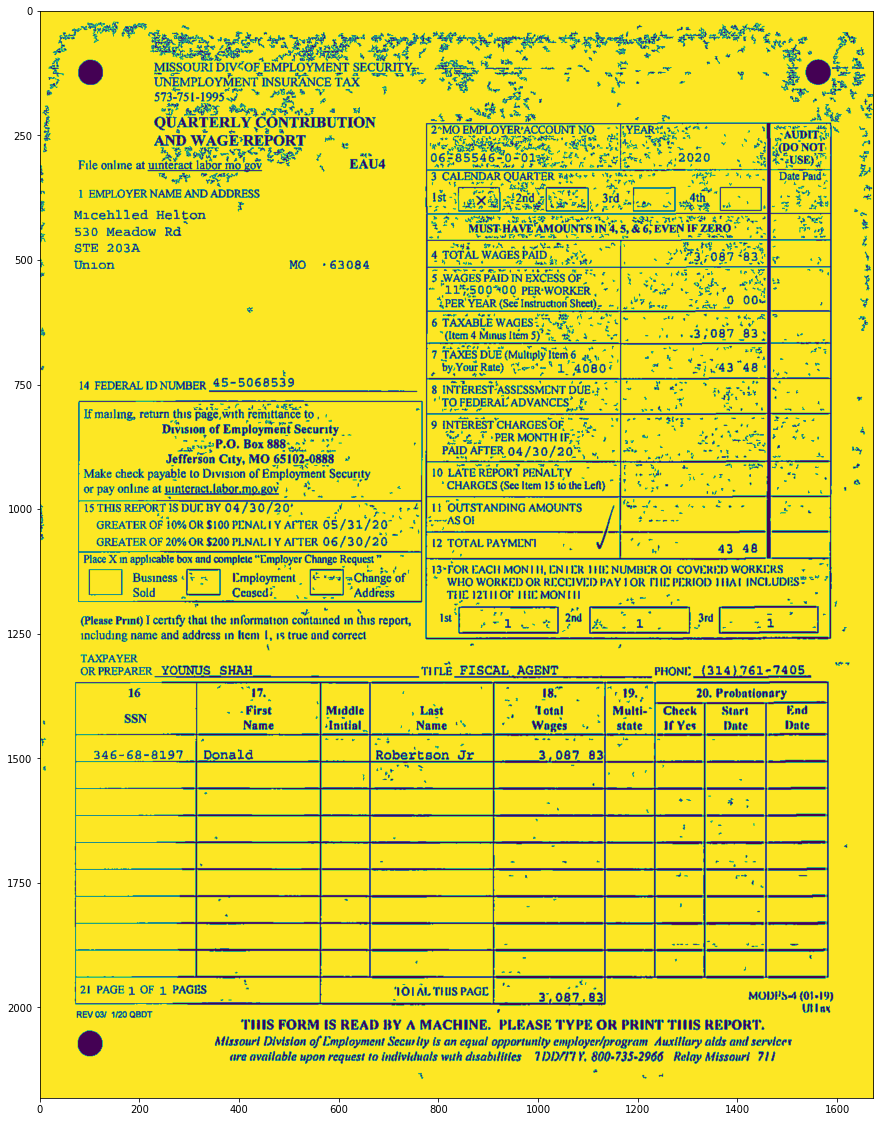

In [127]:
import cv2
from matplotlib import pyplot as plt
image = cv2.imread("/home/vimal/Downloads/0685546001.jpeg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    if cv2.contourArea(c) < 10:
        cv2.drawContours(thresh, [c], -1, (0,0,0), -1)
result = 255 - thresh
#cv2.imshow('result', result)
#cv2.waitKey()
plt.figure(figsize=(20,20))
plt.imshow(result)

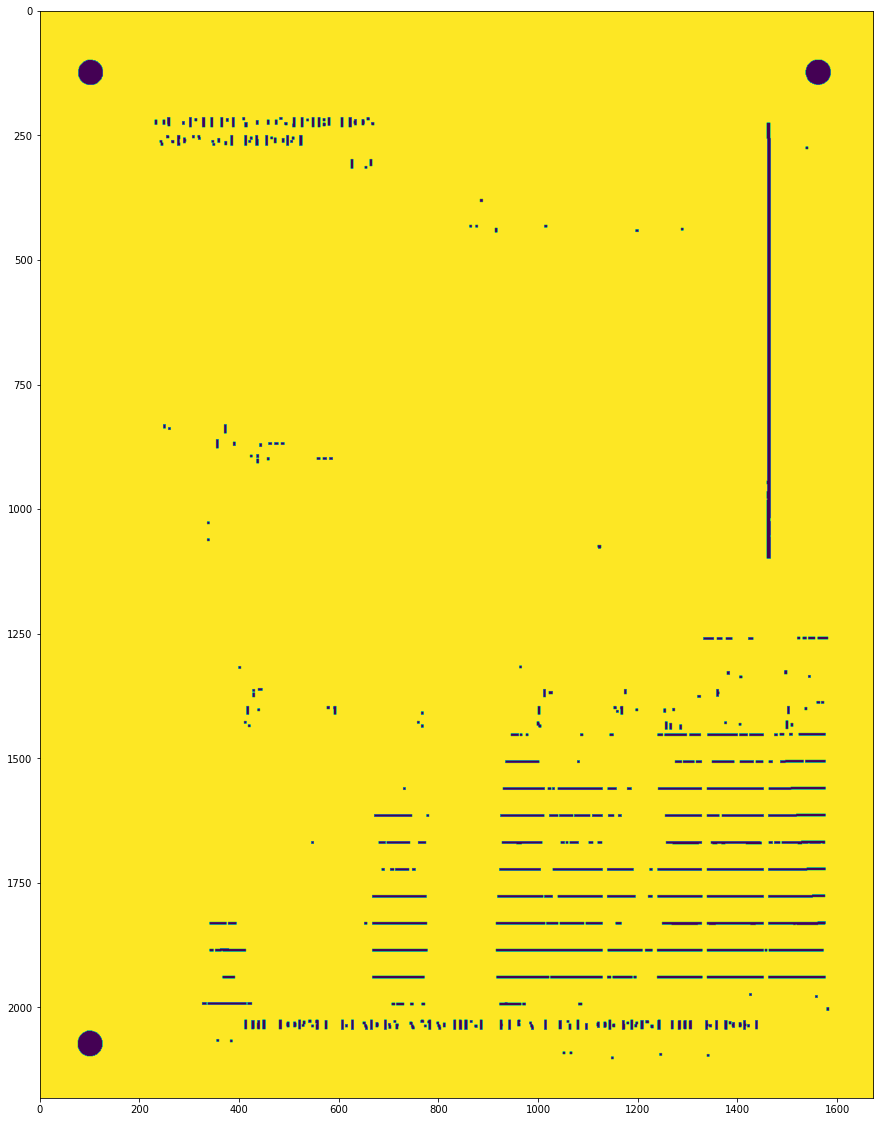

In [129]:
import cv2
image = cv2.imread('/home/vimal/Downloads/0685546001.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
opening = 255 - cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
#cv2.imshow('opening', opening)
#cv2.waitKey()
plt.figure(figsize=(20,20))
plt.imshow(opening)

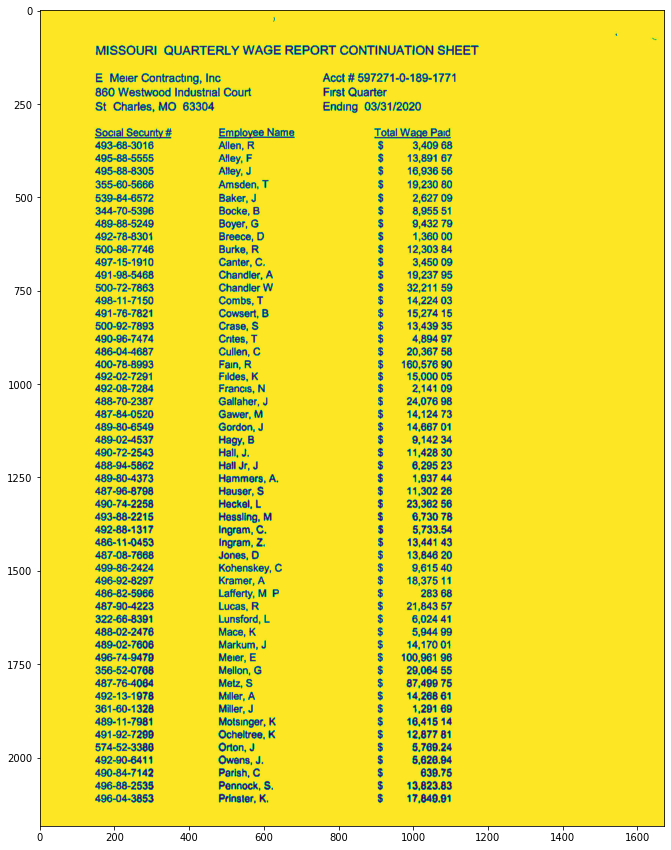

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
  
# Read Images
img = mpimg.imread('/home/vimal/Documents/table_detect_samples/unstructured tables/Input/0430556000.jpeg')

plt.figure(figsize=(15,15))
# Output Images
plt.imshow(img)

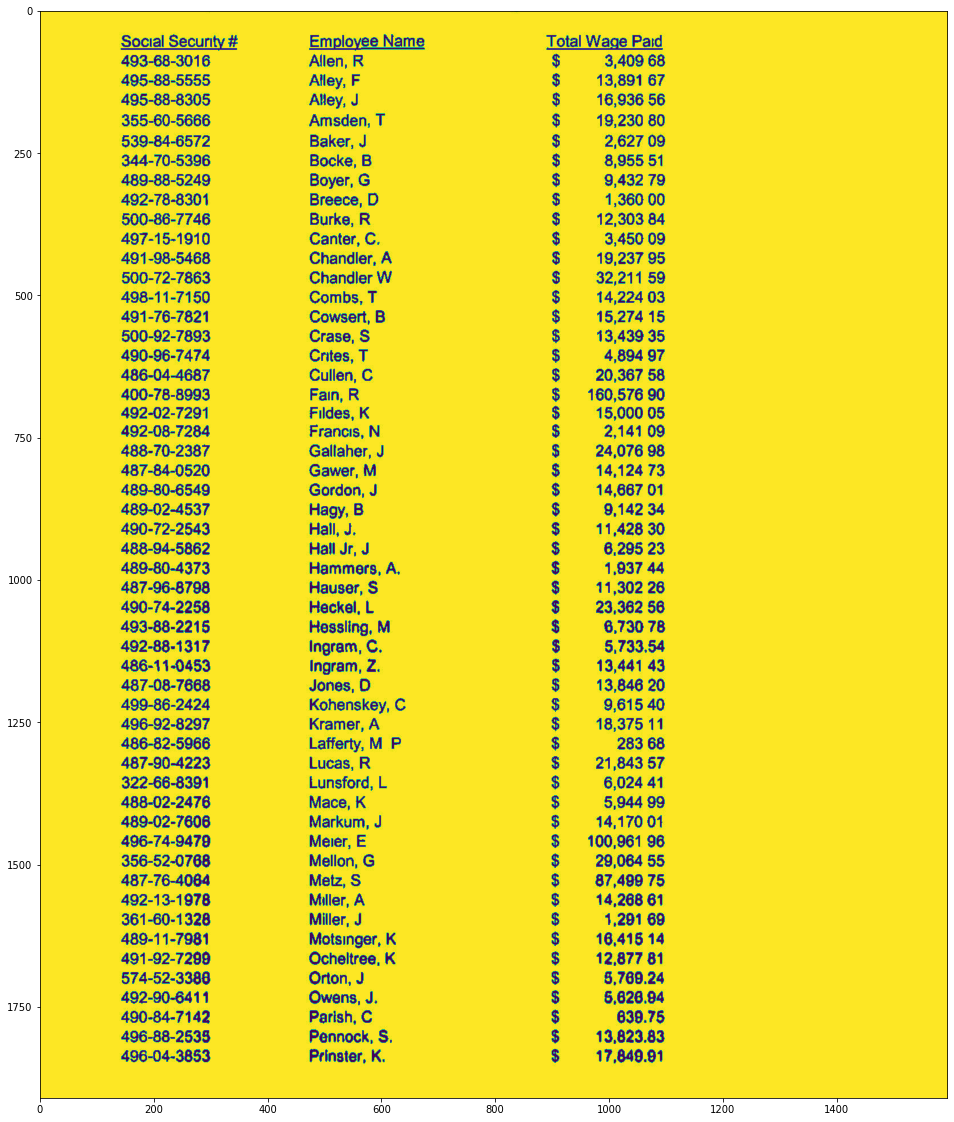

In [2]:
from PIL import Image
import cv2
  
# Opens a image in RGB mode
im = Image.open(r"/home/vimal/Documents/table_detect_samples/unstructured tables/Input/0430556000.jpeg")
#im =cv2.imread('/home/vimal/Documents/table_detect_samples/pre/0347682000.jpeg')
# Size of the image in pixels (size of orginal image)
# (This is not mandatory)
width, height = im.size
  
# Setting the points for cropped image
left = 5
top = height /8
right = 1600
bottom = 3 * height / 3
  
# Cropped image of above dimension
# (It will not change orginal image)
im1 = im.crop((left, top, right, bottom))
plt.figure(figsize=(20,20))
plt.imshow(im1)
im1.save('/home/vimal/Documents/table_detect_samples/unstructured tables/crop_images/0430556000_crop.jpeg')
# Shows the image in image viewer

In [3]:
import cv2
import pytesseract
from pytesseract import Output
import pandas as pd

img = cv2.imread('/home/vimal/Documents/table_detect_samples/unstructured tables/crop_images/0430556000_crop.jpeg')
img = cv2.resize(img, (int(img.shape[1] + (img.shape[1] * .1)),
                       int(img.shape[0] + (img.shape[0] * .25))),
                 interpolation=cv2.INTER_AREA)

img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

custom_config = r'-l eng --oem 3 --psm 6 -c tessedit_char_whitelist="ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789-:.$%./@& *"'
d = pytesseract.image_to_data(img_rgb, config=custom_config, output_type=Output.DICT)
df = pd.DataFrame(d)

df1 = df[(df.conf != '-1') & (df.text != ' ') & (df.text != '')]
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

sorted_blocks = df1.groupby('block_num').first().sort_values('top').index.tolist()
for block in sorted_blocks:
    curr = df1[df1['block_num'] == block]
    sel = curr[curr.text.str.len() > 3]
    # sel = curr
    char_w = (sel.width / sel.text.str.len()).mean()
    prev_par, prev_line, prev_left = 0, 0, 0
    text = ''
    for ix, ln in curr.iterrows():
        # add new line when necessary
        if prev_par != ln['par_num']:
            text += '\n'
            prev_par = ln['par_num']
            prev_line = ln['line_num']
            prev_left = 0
        elif prev_line != ln['line_num']:
            text += '\n'
            prev_line = ln['line_num']
            prev_left = 0

        added = 0  # num of spaces that should be added
        if ln['left'] / char_w > prev_left + 1:
            added = int((ln['left']) / char_w) - prev_left
            text += ' ' * added
        text += ln['text'] + ' '
        prev_left += len(ln['text']) + added + 1
    text += '\n'
    print(text)




          Social Security        Employee  Name                Total Wage Paid 
          493-68-3016            Allen R                        $     3.409 68 
          495-88-5555            Alley F                        $    13.891 67 
          495-88-8305            Alley J                        $    16936  56 
          355-60-5666            Amsden   T                     $    19.230 80 
          539-84-6572            Baker  J                       $     2.627 09 
          344-70-5396            Bocke. B                       $     8955  51 
          489-88-5249            Boyer G                        $     9.432 79 
          492-78-8301            Breece. D                      $     1360  00 
          500-86-7746            Burke  R                       $    12.303 84 
          497-15-1910            Canter C.                      $     3.450 09 
          491-98-5468            Chandler A                     $    19.237 95 
          500-72-7863            Chandl

In [4]:
test1 = text.replace("      ", ",")
print(test1)


,    Social Security,  Employee  Name,,    Total Wage Paid 
,    493-68-3016,,Allen R,,,,$     3.409 68 
,    495-88-5555,,Alley F,,,,$    13.891 67 
,    495-88-8305,,Alley J,,,,$    16936  56 
,    355-60-5666,,Amsden   T,,,   $    19.230 80 
,    539-84-6572,,Baker  J,,,     $     2.627 09 
,    344-70-5396,,Bocke. B,,,     $     8955  51 
,    489-88-5249,,Boyer G,,,,$     9.432 79 
,    492-78-8301,,Breece. D,,,    $     1360  00 
,    500-86-7746,,Burke  R,,,     $    12.303 84 
,    497-15-1910,,Canter C.,,,    $     3.450 09 
,    491-98-5468,,Chandler A,,,   $    19.237 95 
,    500-72-7863,,Chandler W,,,   $    32.211 59 
,    498-11-7150,,Combs   T,,,    $    14.224 03 
,    491-76-7821,,Cowsert  B,,,   $    15.274 15 
,    500-92-7893,,Crase  S,,,     $    13.439 35 
,    490-96-7474,,Crites T,,,     $     4894  97 
,    486-04-4687,,Cullen. C,,,    $    20367  58 
,    400-78-8993,,Fain R,,,, $   160576  90 
,    492-02-7291,,Fildes. K,,,    $    15.000 05 
,    492-08-72

In [5]:
import re
pattern = re.compile(r'(,){2,}')
x = (re.sub(pattern, ',', test1))

In [6]:
text_file = open("/home/vimal/Documents/table_detect_samples/unstructured tables/text/0430556000_text.txt", "wt")
n = text_file.write(x)
text_file.close()

In [7]:
import pandas as pd

df = pd.read_csv('/home/vimal/Documents/table_detect_samples/unstructured tables/text/0430556000_text.txt')
df = df.dropna(how='all', axis=1)
df


Social Security    Employee  Name        Total Wage Paid 
0        493-68-3016           Allen R         $     3.409 68 
1        495-88-5555           Alley F         $    13.891 67 
2        495-88-8305           Alley J         $    16936  56 
3        355-60-5666        Amsden   T         $    19.230 80 
4        539-84-6572          Baker  J         $     2.627 09 
5        344-70-5396          Bocke. B         $     8955  51 
6        489-88-5249           Boyer G         $     9.432 79 
7        492-78-8301         Breece. D         $     1360  00 
8        500-86-7746          Burke  R         $    12.303 84 
9        497-15-1910         Canter C.         $     3.450 09 
10       491-98-5468        Chandler A         $    19.237 95 
11       500-72-7863        Chandler W         $    32.211 59 
12       498-11-7150         Combs   T         $    14.224 03 
13       491-76-7821        Cowsert  B         $    15.274 15 
14       500-92-7893          Crase  S         $    13.439 35 
15       490-96-7474          Crites T         $     4894  97 
16       486-04-4687         Cullen. C         $    20367  58 
17       400-78-8993            Fain R         $   160576  90 
18       492-02-7291         Fildes. K         $    15.000 05 
19       492-08-7284         Francis N         $     2.141 09 
20       488-70-2387        Gallaher J         $    24.076 98 
21       487-84-0520          Gawer  M         $    14.124 73 
22       489-80-6549         Gordon  J         $    14.667 01 
23       489-02-4537           Hagy  B          $     9142.34 
24       490-72-2543           Hall J.         $    11.428 30 
25       488-94-5862        Hall Jr. J         $     6.295 23 
26       489-80-4373      Hammers.  A.         $     1.937 44 
27       487-96-8798         Hauser  S         $    11302  26 
28       490-74-2258         Heckel. L        $     23.362 56 
29       493-88-2215       Hessling. M         $     6.730 78 
30       492-88-1317        Ingram. C.         $     5.733.54 
31       486-11-0453         Ingram 2.         $    13441  43 
32       487-08-7668          Jones  0         $    13846  20 
33       499-86-2424      Kohenskey  C         $     9.615 40 
34       496-92-8297         Kramer  A         $    18375  11 
35       486-82-5966      Lafferty M P         $       283 68 
36       487-90-4223          Lucas. R         $    21843  57 
37       322-66-8391        Lunsford L         $     6.024 41 
38       488-02-2476           Mace. K         $     5.944 99 
39       489-02-7606         Markum  J         $    14.170 01 
40       496-74-9479           Meier E        $    100.961 96 
41       356-52-0768          Mellon G         $    29.064 55 
42       487-76-4064           Metz. S         $    87.499 75 
43       492-13-1978         Miller. A         $    14.268 61 
44       361-60-1328         Miller. J         $     1.281 69 
45       489-11-7981      Motsinger. K         $    16418  14 
46       491-92-7208       Ocheltree K         $    12.877 81 
47       574-52-3386          Orton. J         $     8.760.24 
48       492-90-6411         Qwens. J.          $     6626.94 
49       490-84-7142          Parish C         $       639.75 
50       496-88-2535       Pennock  S.         $    13.823.83 
51       496-04-3853      Prinster. K.         $     17649.91

In [8]:
df.to_csv('/home/vimal/Documents/table_detect_samples/unstructured tables/CSV/0430556000_text.csv', 
                  index = None)

In [ ]:
from PIL import Image
import cv2
  
# Opens a image in RGB mode
im = Image.open(r"/home/vimal/Documents/table_detect_samples/pre/0147965000.jpeg")
#im =cv2.imread('/home/vimal/Documents/table_detect_samples/pre/0347682000.jpeg')
# Size of the image in pixels (size of orginal image)
# (This is not mandatory)
width, height = im.size
  
# Setting the points for cropped image
left = 5
top = height /10
right = 1600
bottom = 3 * height / 5
  
# Cropped image of above dimension
# (It will not change orginal image)
im1 = im.crop((left, top, right, bottom))
plt.figure(figsize=(20,20))
plt.imshow(im1)
im1.save('crop1_img.jpeg')
# Shows the image in image viewer

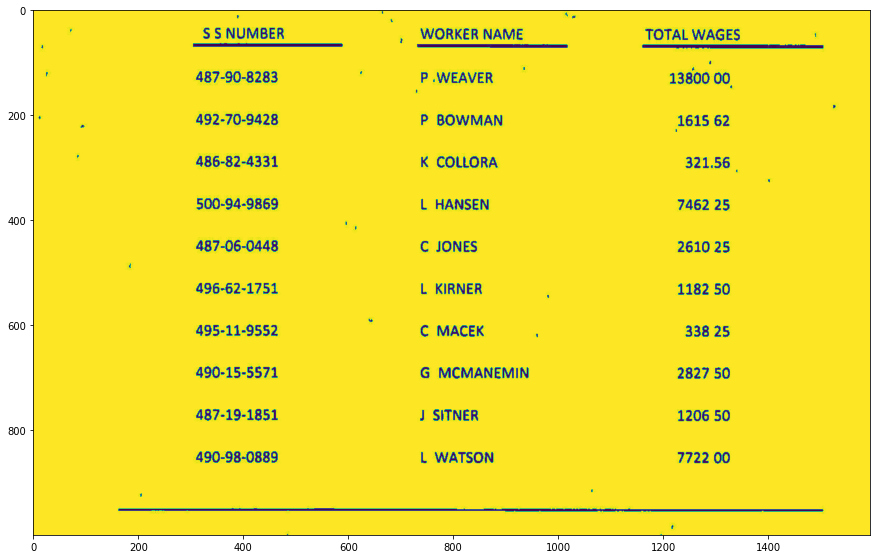

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
  
# Read Images
img = mpimg.imread('/home/vimal/Documents/table_detect_samples/unstructured tables/crop_images/00128371000_crop.jpeg')

plt.figure(figsize=(15,15))
# Output Images
plt.imshow(img)

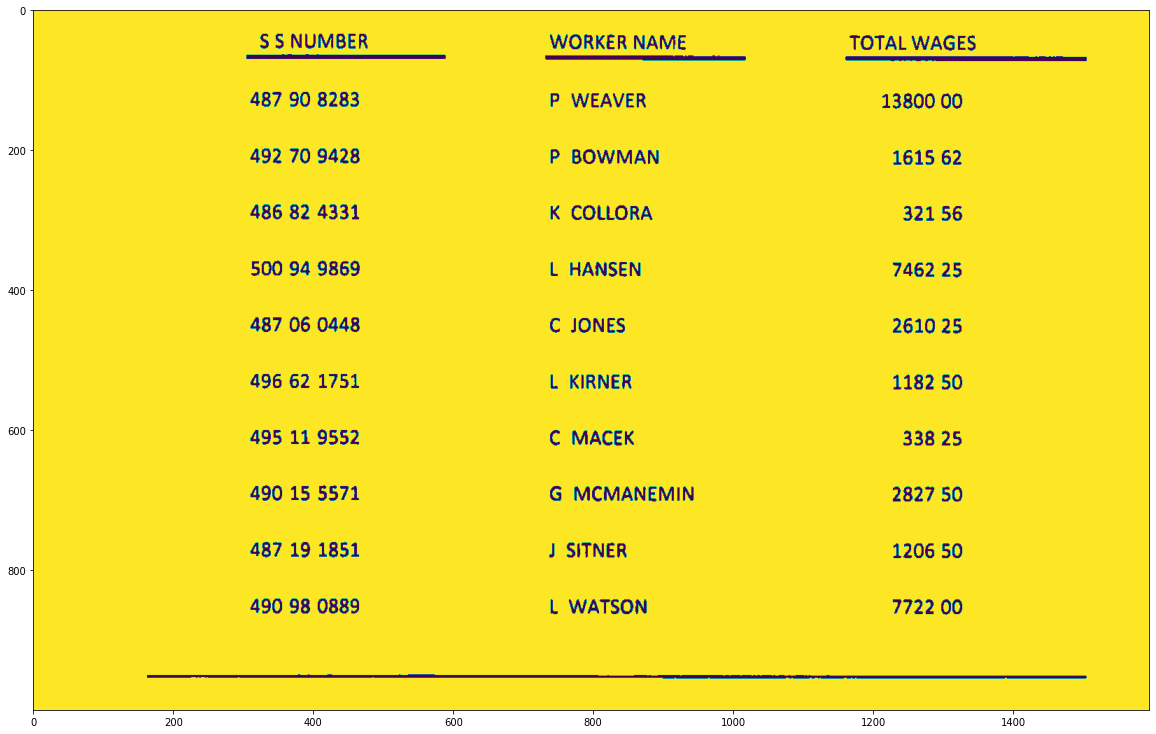

In [2]:
import cv2
import numpy as np
img = cv2.imread("/home/vimal/Documents/table_detect_samples/unstructured tables/crop_images/00128371000_crop.jpeg", 0)
_, blackAndWhite = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(blackAndWhite, None, None, None, 8, cv2.CV_32S)
sizes = stats[1:, -1] #get CC_STAT_AREA component
img2 = np.zeros((labels.shape), np.uint8)
for i in range(0, nlabels - 1):
    if sizes[i] >= 50:   #filter small dotted regions
        img2[labels == i + 1] = 255
res = cv2.bitwise_not(img2)

plt.figure(figsize=(20,20))
plt.imshow(res)

In [4]:
from PIL import Image
im = Image.fromarray(res)
im.save("/home/vimal/Documents/table_detect_samples/unstructured tables/crop_images/00128371000_crop.jpeg")

In [5]:
import cv2
import pytesseract
from pytesseract import Output
import pandas as pd

img = cv2.imread('/home/vimal/Documents/table_detect_samples/unstructured tables/crop_images/00128371000_crop.jpeg')
img = cv2.resize(img, (int(img.shape[1] + (img.shape[1] * .1)),
                       int(img.shape[0] + (img.shape[0] * .25))),
                 interpolation=cv2.INTER_AREA)

img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

custom_config = r'-l eng --oem 3 --psm 6 -c tessedit_char_whitelist="ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789-:.$%./@& *"'
d = pytesseract.image_to_data(img_rgb, config=custom_config, output_type=Output.DICT)
df = pd.DataFrame(d)

df1 = df[(df.conf != '-1') & (df.text != ' ') & (df.text != '')]
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

sorted_blocks = df1.groupby('block_num').first().sort_values('top').index.tolist()
for block in sorted_blocks:
    curr = df1[df1['block_num'] == block]
    sel = curr[curr.text.str.len() > 3]
    # sel = curr
    char_w = (sel.width / sel.text.str.len()).mean()
    prev_par, prev_line, prev_left = 0, 0, 0
    text = ''
    for ix, ln in curr.iterrows():
        # add new line when necessary
        if prev_par != ln['par_num']:
            text += '\n'
            prev_par = ln['par_num']
            prev_line = ln['line_num']
            prev_left = 0
        elif prev_line != ln['line_num']:
            text += '\n'
            prev_line = ln['line_num']
            prev_left = 0

        added = 0  # num of spaces that should be added
        if ln['left'] / char_w > prev_left + 1:
            added = int((ln['left']) / char_w) - prev_left
            text += ' ' * added
        text += ln['text'] + ' '
        prev_left += len(ln['text']) + added + 1
    text += '\n'
    print(text)




                    SS NUMBER                 WORKER  NAME               TOTAL WAGES 
                   487 90 8283                P WEAVER                      13800 00 
                   492 70 9428                P BOWMAN                       1615 62 
                   486 82 4331                K COLLORA                       32156 
                   500 94 9869                L HANSEN                       7462 25 
                   487 06 0448                C JONES                        2610 25 
                   496 62 1751                L KIRNER                       1182 50 
                   495 11 9552                C MACEK                         338 25 
                   490 15 5571                G MCMANEMIN                    2827 50 
                   487 19 1851                J SITNER                       1206 50 
                   490 98 0889                L WATSON                       7722 00 



In [6]:
test1 = text.replace("   ", ",")
print(test1)


,,,,,,  SS NUMBER,,,,,  WORKER  NAME,,,,,TOTAL WAGES 
,,,,,, 487 90 8283,,,,, P WEAVER,,,,,,, 13800 00 
,,,,,, 492 70 9428,,,,, P BOWMAN,,,,,,,  1615 62 
,,,,,, 486 82 4331,,,,, K COLLORA,,,,,,,  32156 
,,,,,, 500 94 9869,,,,, L HANSEN,,,,,,,  7462 25 
,,,,,, 487 06 0448,,,,, C JONES,,,,,,,,2610 25 
,,,,,, 496 62 1751,,,,, L KIRNER,,,,,,,  1182 50 
,,,,,, 495 11 9552,,,,, C MACEK,,,,,,,, 338 25 
,,,,,, 490 15 5571,,,,, G MCMANEMIN,,,,,,  2827 50 
,,,,,, 487 19 1851,,,,, J SITNER,,,,,,,  1206 50 
,,,,,, 490 98 0889,,,,, L WATSON,,,,,,,  7722 00 



In [7]:
import re
pattern = re.compile(r'(,){2,}')
x = (re.sub(pattern, ',', test1))

text_file = open("/home/vimal/Documents/table_detect_samples/unstructured tables/text/00128371000_text.txt", "wt")
n = text_file.write(x)
text_file.close()

import pandas as pd

df = pd.read_csv('/home/vimal/Documents/table_detect_samples/unstructured tables/text/00128371000_text.txt')
df = df.dropna(how='all', axis=1)
df.to_csv('/home/vimal/Documents/table_detect_samples/unstructured tables/CSV/00128371000_text.csv', 
                  index = None)
df

SS NUMBER   WORKER  NAME TOTAL WAGES 
0   487 90 8283       P WEAVER    13800 00 
1   492 70 9428       P BOWMAN     1615 62 
2   486 82 4331      K COLLORA       32156 
3   500 94 9869       L HANSEN     7462 25 
4   487 06 0448        C JONES     2610 25 
5   496 62 1751       L KIRNER     1182 50 
6   495 11 9552        C MACEK      338 25 
7   490 15 5571    G MCMANEMIN     2827 50 
8   487 19 1851       J SITNER     1206 50 
9   490 98 0889       L WATSON     7722 00

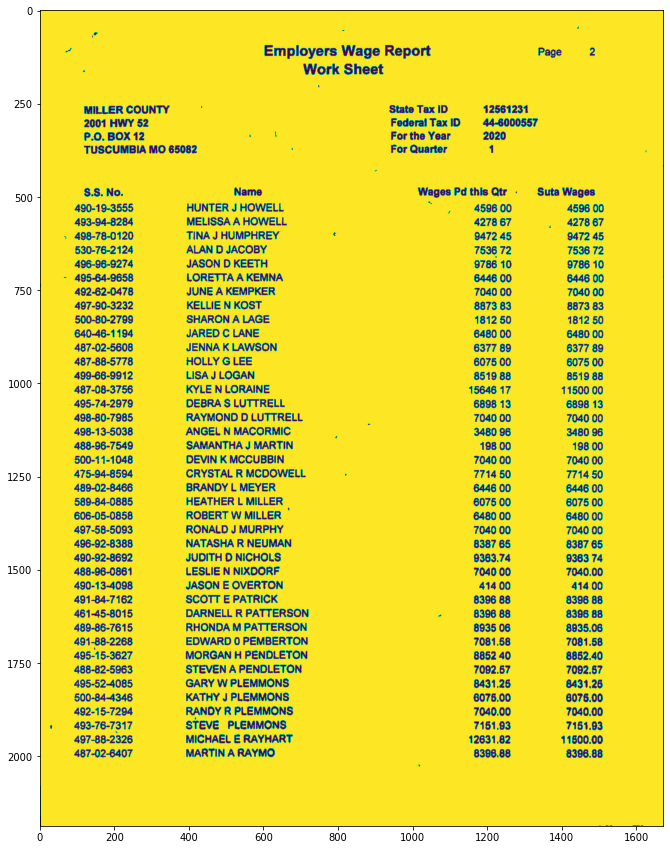

In [34]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
  
# Read Images
img = mpimg.imread('/home/vimal/Documents/table_detect_samples/unstructured tables/Input/0812921000.jpeg')

plt.figure(figsize=(15,15))
# Output Images
plt.imshow(img)

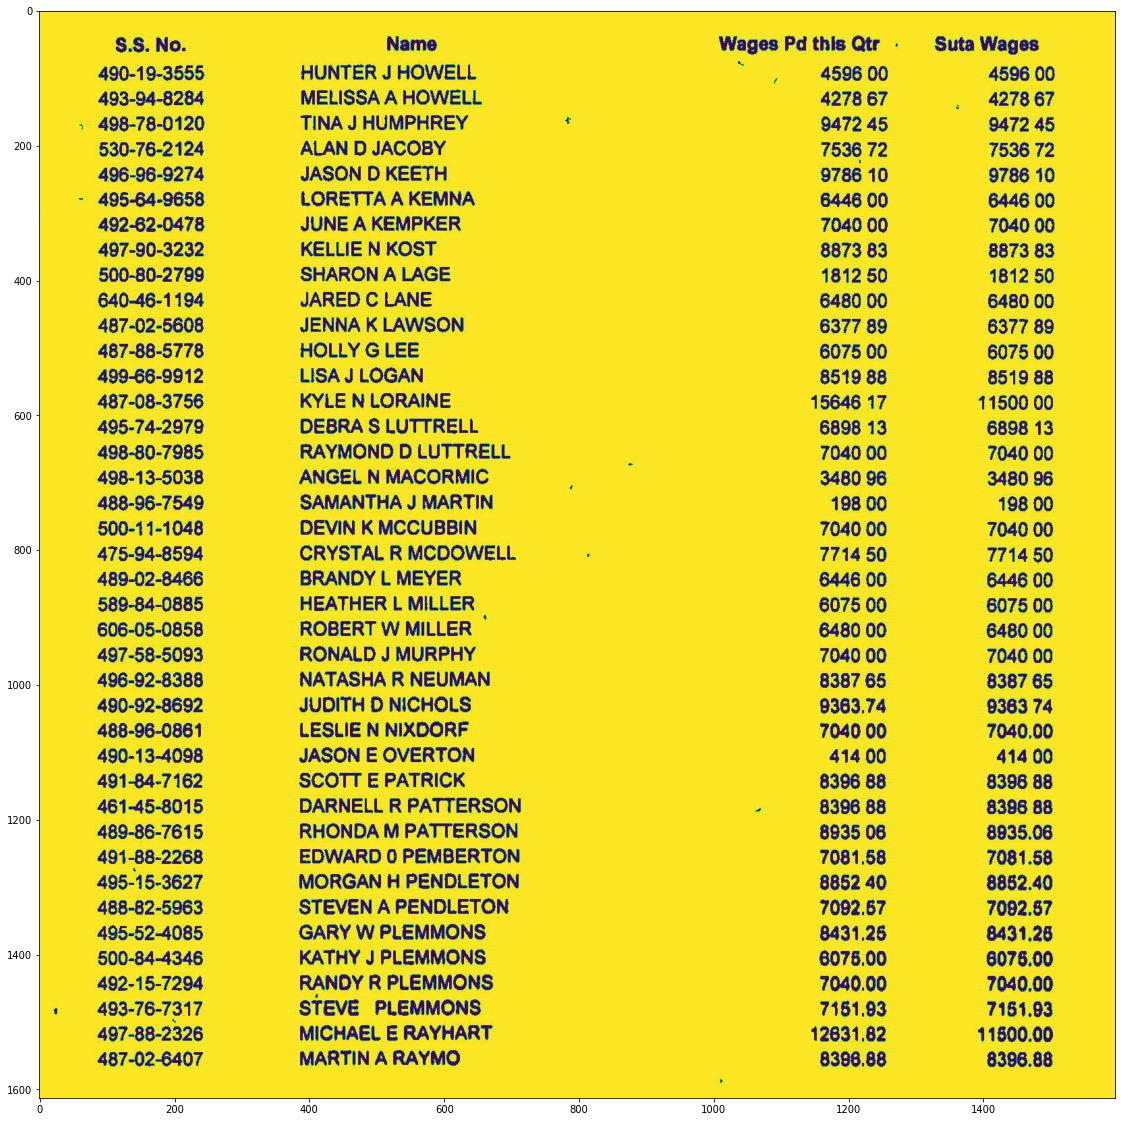

In [48]:
from PIL import Image
import cv2
  
# Opens a image in RGB mode
im = Image.open(r"/home/vimal/Documents/table_detect_samples/unstructured tables/Input/0812921000.jpeg")
#im =cv2.imread('/home/vimal/Documents/table_detect_samples/pre/0347682000.jpeg')
# Size of the image in pixels (size of orginal image)
# (This is not mandatory)
width, height = im.size
  
# Setting the points for cropped image
left = 5
top = height /5
right = 1600
bottom = 3 * height / 3.2

  
# Cropped image of above dimension
# (It will not change orginal image)
im1 = im.crop((left, top, right, bottom))
plt.figure(figsize=(20,20))
plt.imshow(im1)
im1.save('/home/vimal/Documents/table_detect_samples/unstructured tables/crop_images/0812921000_crop.jpeg')
# Shows the image in image viewer

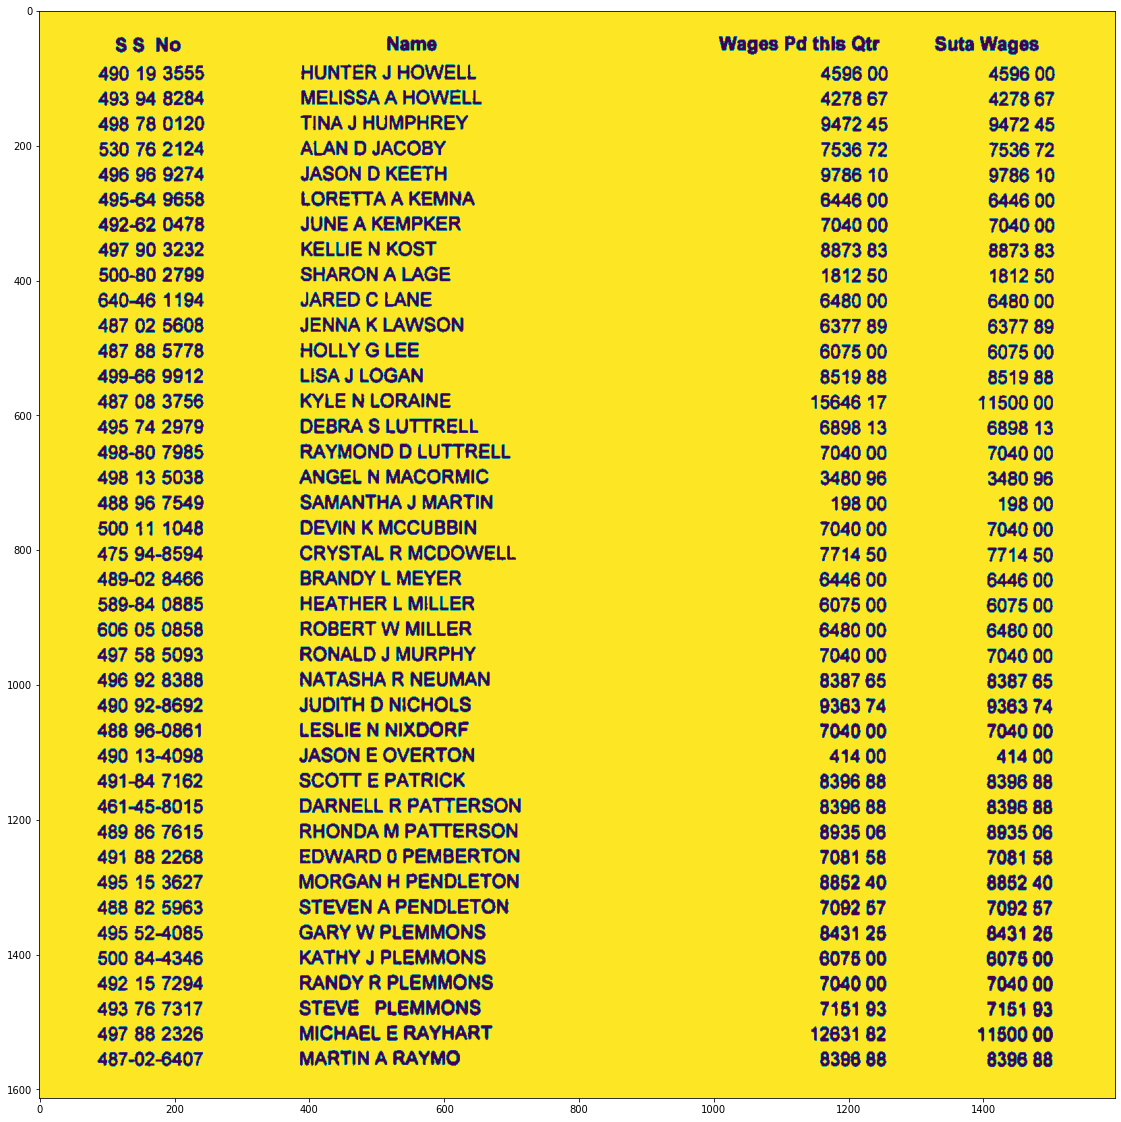

In [49]:
import cv2
import numpy as np
img = cv2.imread("/home/vimal/Documents/table_detect_samples/unstructured tables/crop_images/0812921000_crop.jpeg", 0)
_, blackAndWhite = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(blackAndWhite, None, None, None, 8, cv2.CV_32S)
sizes = stats[1:, -1] #get CC_STAT_AREA component
img2 = np.zeros((labels.shape), np.uint8)
for i in range(0, nlabels - 1):
    if sizes[i] >= 50:   #filter small dotted regions
        img2[labels == i + 1] = 255
res = cv2.bitwise_not(img2)

plt.figure(figsize=(20,20))
plt.imshow(res)

In [64]:
from PIL import Image
im = Image.fromarray(res)
im.save("/home/vimal/Documents/table_detect_samples/unstructured tables/crop_images/0812921000_crop.jpeg")

In [65]:
import cv2
import pytesseract
from pytesseract import Output
import pandas as pd

img = cv2.imread('/home/vimal/Documents/table_detect_samples/unstructured tables/crop_images/0812921000_crop.jpeg')
img = cv2.resize(img, (int(img.shape[1] + (img.shape[1] * .1)),
                       int(img.shape[0] + (img.shape[0] * .25))),
                 interpolation=cv2.INTER_AREA)

img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

custom_config = r'-l eng --oem 3 --psm 6 -c tessedit_char_whitelist="ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789-:.$%./@& *"'
d = pytesseract.image_to_data(img_rgb, config=custom_config, output_type=Output.DICT)
df = pd.DataFrame(d)

df1 = df[(df.conf != '-1') & (df.text != ' ') & (df.text != '')]
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

sorted_blocks = df1.groupby('block_num').first().sort_values('top').index.tolist()
for block in sorted_blocks:
    curr = df1[df1['block_num'] == block]
    sel = curr[curr.text.str.len() > 3]
    # sel = curr
    char_w = (sel.width / sel.text.str.len()).mean()
    prev_par, prev_line, prev_left = 0, 0, 0
    text = ''
    for ix, ln in curr.iterrows():
        # add new line when necessary
        if prev_par != ln['par_num']:
            text += '\n'
            prev_par = ln['par_num']
            prev_line = ln['line_num']
            prev_left = 0
        elif prev_line != ln['line_num']:
            text += '\n'
            prev_line = ln['line_num']
            prev_left = 0

        added = 0  # num of spaces that should be added
        if ln['left'] / char_w > prev_left + 1:
            added = int((ln['left']) / char_w) - prev_left
            text += ' ' * added
        text += ln['text'] + ' '
        prev_left += len(ln['text']) + added + 1
    text += '\n'
    print(text)




       $S No                    Name                          Wages Pd this Qtr   Suta Wages 
     490 19 3555        HUNTER J HOWELL                                 4596 00        4596 00 
     493 94 8284        MELISSA A HOWELL                                4278 67        4278 67 
     498 78 0120        TINA J HUMPHREY                                 9472 45        9472 45 
     530 76 2124        ALAN D JACOBY                                   7536 72        7536 72 
     496 96 9274        JASON D KEETH                                   9786 10        9786 10 
     495-64 9658        LORETTA A KEMNA                                 6446 00        6446 00 
     492-62 0478        JUNE A KEMPKER                                  7040 00        7040 00 
     497 90 3232        KELLIE N KOST                                   8873 83        8873 83 
     500-80 2799        SHARON A LAGE                                   1812 50        1812 50 
     640-46 1194        JARED C LANE     

In [66]:
test1 = text.replace("   ", ",")
print(test1)


,, $S No,,,,,,  Name,,,,,,,,  Wages Pd this Qtr,Suta Wages 
,  490 19 3555,,  HUNTER J HOWELL,,,,,,,,,,,4596 00,,  4596 00 
,  493 94 8284,,  MELISSA A HOWELL,,,,,,,,,,  4278 67,,  4278 67 
,  498 78 0120,,  TINA J HUMPHREY,,,,,,,,,,,9472 45,,  9472 45 
,  530 76 2124,,  ALAN D JACOBY,,,,,,,,,,,  7536 72,,  7536 72 
,  496 96 9274,,  JASON D KEETH,,,,,,,,,,,  9786 10,,  9786 10 
,  495-64 9658,,  LORETTA A KEMNA,,,,,,,,,,,6446 00,,  6446 00 
,  492-62 0478,,  JUNE A KEMPKER,,,,,,,,,,, 7040 00,,  7040 00 
,  497 90 3232,,  KELLIE N KOST,,,,,,,,,,,  8873 83,,  8873 83 
,  500-80 2799,,  SHARON A LAGE,,,,,,,,,,,  1812 50,,  1812 50 
,  640-46 1194,,  JARED C LANE,,,,,,,,,,,  6480 00,,,6480 00 
,  487 02 5608,,  JENNA K LAWSON,,,,,,,,,,,6377 89,,,6377 89 
,  487 88 5778,,  HOLLY G LEE,,,,,,,,,,,,6075 00,,,6075 00 
,  499-66 9912,,  LISA J LOGAN,,,,,,,,,,,  8519 88,,,8519 88 
,  487 08 3756,,  KYLE N LORAINE,,,,,,,,,,,15646 17,, 11500 00 
,  495 74 2979,,  DEBRA S LUTTRELL,,,,,,,,,, 6898 1

In [68]:
import re
pattern = re.compile(r'(,){2,}')
x = (re.sub(pattern, ',', test1))



In [69]:
text_file = open("/home/vimal/Documents/table_detect_samples/unstructured tables/text/0812921000_text.txt", "wt")
n = text_file.write(x)
text_file.close()

In [71]:
import pandas as pd

df = pd.read_csv('/home/vimal/Documents/table_detect_samples/unstructured tables/text/0812921000_text.txt')
df = df.dropna(how='all', axis=1)
df.to_csv('/home/vimal/Documents/table_detect_samples/unstructured tables/CSV/0812921000_text.csv', 
                  index = None)
df

$S No                   Name   Wages Pd this Qtr Suta Wages 
0     490 19 3555        HUNTER J HOWELL             4596 00    4596 00 
1     493 94 8284       MELISSA A HOWELL             4278 67    4278 67 
2     498 78 0120        TINA J HUMPHREY             9472 45    9472 45 
3     530 76 2124          ALAN D JACOBY             7536 72    7536 72 
4     496 96 9274          JASON D KEETH             9786 10    9786 10 
5     495-64 9658        LORETTA A KEMNA             6446 00    6446 00 
6     492-62 0478         JUNE A KEMPKER             7040 00    7040 00 
7     497 90 3232          KELLIE N KOST             8873 83    8873 83 
8     500-80 2799          SHARON A LAGE             1812 50    1812 50 
9     640-46 1194           JARED C LANE             6480 00    6480 00 
10    487 02 5608         JENNA K LAWSON             6377 89    6377 89 
11    487 88 5778            HOLLY G LEE             6075 00    6075 00 
12    499-66 9912           LISA J LOGAN             8519 88    8519 88 
13    487 08 3756         KYLE N LORAINE            15646 17   11500 00 
14    495 74 2979       DEBRA S LUTTRELL             6898 13    6898 13 
15    498-80 7985    RAYMOND  D LUTTRELL             7040 00    7040 00 
16    498 13 5038      ANGEL  N MACORMIC             3480 96    3480 96 
17    488 96 7549      SAMANTHA J MARTIN              198 00     198 00 
18    500 11 1048       DEVIN K MCCUBBIN             7040 00    7040 00 
19    475 94-8594     CRYSTAL R MCDOWELL             7714 50    7714 50 
20    489-02 8466         BRANDY L MEYER             6446 00    6446 00 
21    589-84 0885       HEATHER L MILLER             6075 00    6075 00 
22    606 05 0858        ROBERT W MILLER             6480 00    6480 00 
23    497 58 5093        RONALD J MURPHY             7040 00    7040 00 
24    496 92 8388       NATASHA R NEUMAN             8387 65    8387 65 
25    490 92-8692       JUDITH D NICHOLS             9363 74    0363 74 
26    488 96-0861       LESLIE N NIXOORF             7040 00    7040 00 
27    490 13-4098       JASON  E OVERTON               41400     414 00 
28    491-84 7162       SCOTT  E PATRICK             8396 88    8396 88 
29    461-45-8015    DARNELL R PATTERSON             8396 88    8396 88 
30    489 86 7615     RHONDA M PATTERSON             8935 06    8935 06 
31    491 88 2268    EDWARD  0 PEMBERTON             7081 58    7081 58 
32    495 15 3627     MORGAN H PENDLETON             8852 40    8852 40 
33    488 82 5963    STEVEN  A PENDLETON             7092 67    7082 87 
34    495 52-4085       GARY  W PLEMMONS             8431 26    6431 26 
35    500 84-4346       KATHY J PLEMMONS             6078 00    6076 00 
36    492 15 7294       RANDY R PLEMMONS             7040 00    7040 00 
37    493 76 7317         STEVE PLEMMONS             7181 93    7181 93 
38    497 88 2326      MICHAEL E RAYHART            12631 62   11800 00 
39    487-02-6407         MARTIN A RAYMO             8386 88    8396 88